# Veamos los datos para decidir tamaño de los crops, anchor boxes, etc

In [19]:
%load_ext autoreload
%autoreload 2
import pandas as pd
from pathlib import Path
from detection_helper import create_DF
from matplotlib import pyplot as plt
import numpy as np

import random

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
import pickle
with open("data.pkl","rb") as f:
    (df_train, df_val, train_files_names, val_files_names, classes_idx, cant_classes, classes) = pickle.load(f)

Train:


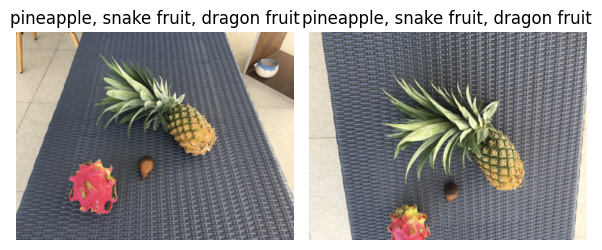

Val:


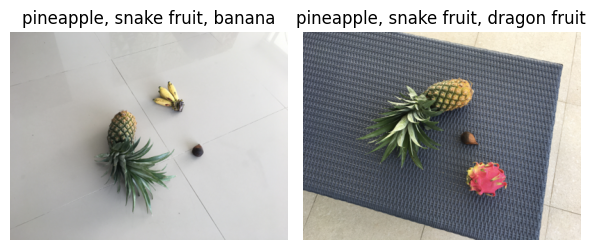

In [21]:
def display_random_images(df):
    
    unique_images = df['image_name'].unique()
    random_images = random.sample(list(unique_images), 2)
    
    fig, axes = plt.subplots(1, 2, figsize=(6, 4))
    
    for i, image_name in enumerate(random_images):

        rows = df[df['image_name'] == image_name]
        
        image_path = rows.iloc[0]['image']
        image = plt.imread(image_path)
        axes[i].imshow(image)
        
        # a una misma imagen le corresponde más de un label
        labels = rows['label'].values
        labels_str = ', '.join(labels)
        axes[i].set_title(f'{labels_str}')
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()

print("Train:")
display_random_images(df_train)

print("Val:")
display_random_images(df_val)

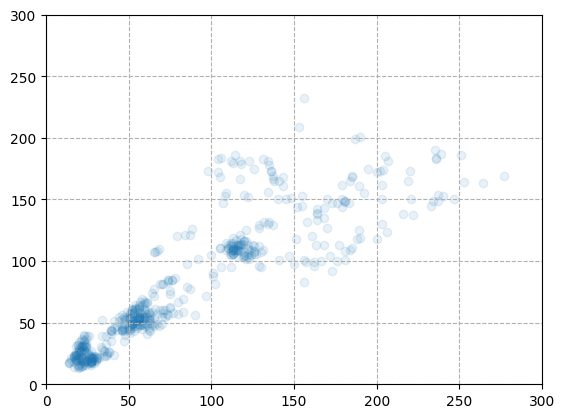

In [22]:
plt.scatter(df_train["delta_x"], df_train["delta_y"], alpha=0.1)
plt.xlim([0,300])
plt.ylim([0,300])
plt.grid(True, linestyle='--')
plt.show()

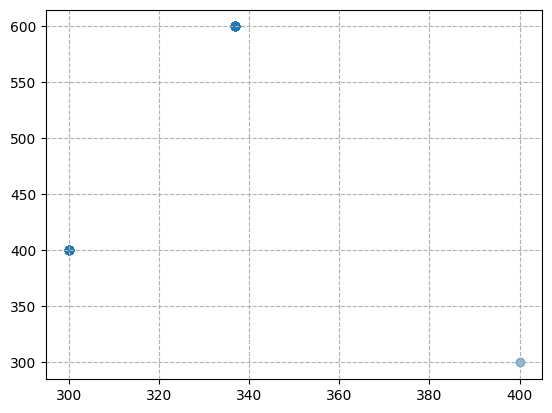

In [23]:
plt.scatter(df_train["height"], df_train["width"], alpha=0.1)
plt.grid(True, linestyle='--')
plt.show()

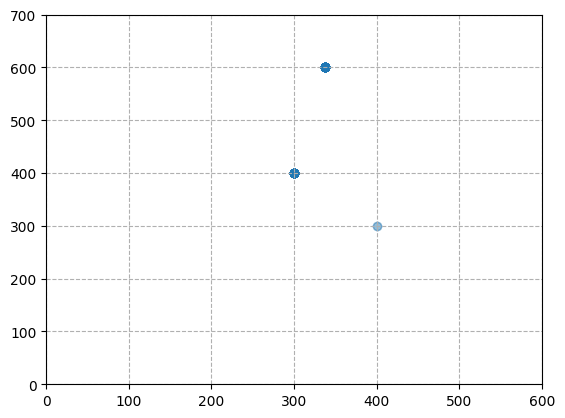

In [24]:
plt.scatter(df_train["height"],df_train["width"], alpha=0.1)
plt.xlim([0,600])
plt.ylim([0,700])
plt.grid(True, linestyle='--')
plt.show()

# Vamos a usar crops de 300 x 300
Es la sección más chica posible contenida.
